In [49]:
# -- import packages --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

In [32]:
# -- import dataset --
churn_df = pd.read_csv('bank_data.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Part 1 - Data Exploration
### 1.1 - check the raw data

In [33]:
# row count
print ("Num of rows: " + str(churn_df.shape[0])) 
# col count
print ("Num of columns: " + str(churn_df.shape[1])) 

Num of rows: 10000
Num of columns: 14


In [34]:
#  check data information
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [35]:
# check the unique values for each column
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [36]:
# get target variable
y = churn_df['Exited']

In [37]:
# check the propotion of y = 1
print("propotion of y = 1:", y.sum() / y.shape * 100)

propotion of y = 1: [20.37]


### 1.2 check the features

In [38]:
# check missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


Text(0.5, 1.0, 'Exited vs EstimatedSalary')

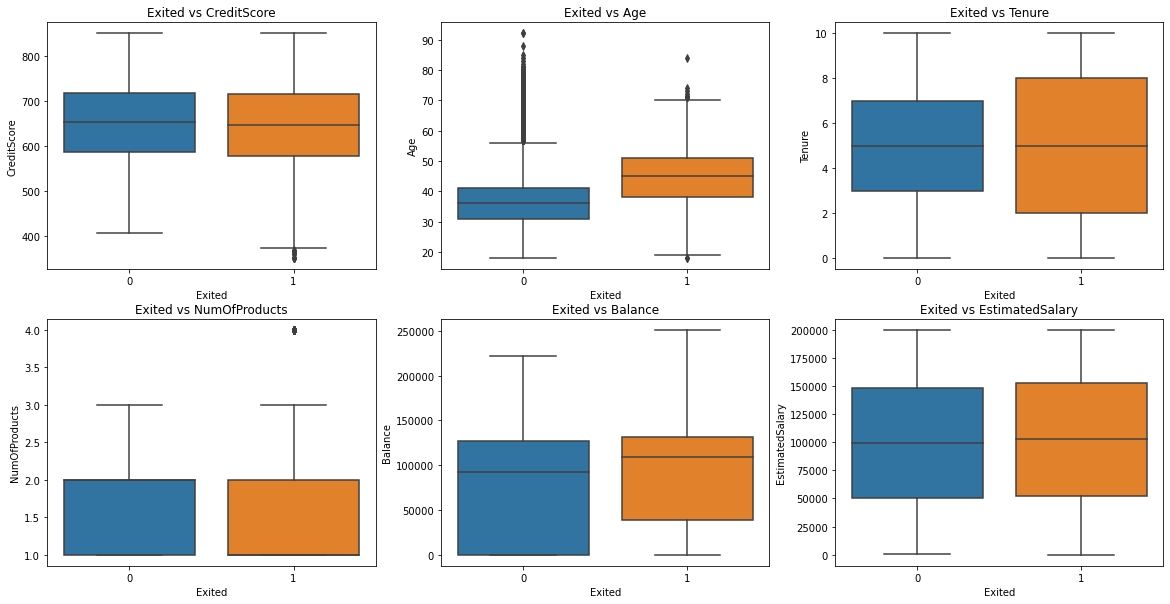

In [40]:
# boxplot for numerical feature
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0]).set_title('Exited vs CreditScore') 
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1]).set_title('Exited vs Age') 
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[0][2]).set_title('Exited vs Tenure') 
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][0]).set_title('Exited vs NumOfProducts') 
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[1][1]).set_title('Exited vs Balance') 
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[1][2]).set_title('Exited vs EstimatedSalary') 

Text(0.5, 1.0, 'Exited vs IsActiveMember')

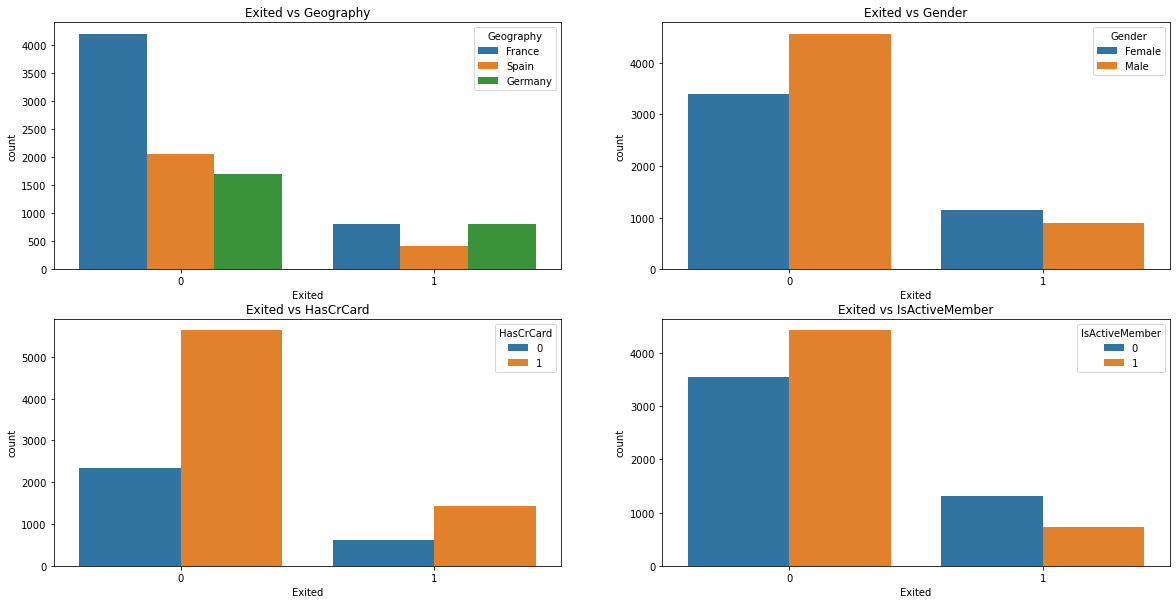

In [41]:
_,axss = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0]).set_title('Exited vs Geography') 
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1]).set_title('Exited vs Gender') 
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0]).set_title('Exited vs HasCrCard')
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1]).set_title('Exited vs IsActiveMember') 

<AxesSubplot:>

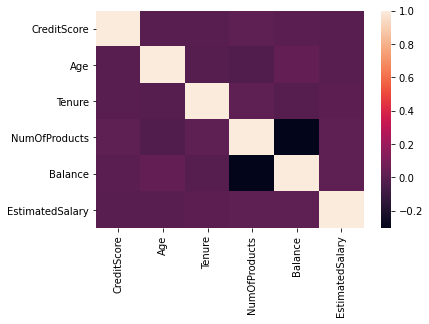

In [42]:
# correlations between features
corr_score = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].corr()

# show heapmap of correlations
sns.heatmap(corr_score)

In [43]:
# check the actual values of correlations
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


## Part 2 - feature preprocessing
### feature encoding, feature scaling

In [44]:
# ordinal encoding
churn_df['Gender'] = churn_df['Gender'] == 'Female'

In [45]:
# one hot encoding
churn_df = pd.get_dummies(churn_df, columns=['Geography'], drop_first=True)

In [46]:
# Get feature space by dropping useless feature
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)

In [48]:
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,True,42,2,0.00,1,1,1,101348.88,0,0
1,608,True,41,1,83807.86,1,0,1,112542.58,0,1
2,502,True,42,8,159660.80,3,1,0,113931.57,0,0
3,699,True,39,1,0.00,2,0,0,93826.63,0,0
4,850,True,43,2,125510.82,1,1,1,79084.10,0,1
5,645,False,44,8,113755.78,2,1,0,149756.71,0,1
6,822,False,50,7,0.00,2,1,1,10062.80,0,0
7,376,True,29,4,115046.74,4,1,0,119346.88,1,0
8,501,False,44,4,142051.07,2,0,1,74940.50,0,0
9,684,False,27,2,134603.88,1,1,1,71725.73,0,0


## Part 3 - Model Training and Result Evaluation 
### 3.1 split dataset

In [50]:
# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observation with 11 features
test data has 2500 observation with 11 features


In [51]:
# Scale the data, using standardization
# standardization (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 3.2 model training and selection 

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# Support-vector Machine
classifier_SVM = SVC(probability=True)

In [68]:
# Train the model
classifier_logistic.fit(X_train, y_train)
# Prediction of test data
classifier_logistic.predict(X_test)
# Accuracy of test data
logistic_scorec = classifier_logistic.score(X_test, y_test)
print("Model accuracy of logistic regression is:", logistic_scorec)

Model accuracy of logistic regression is: 0.808


In [69]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest', 'SVM']
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classifier_SVM]
count = 0

for classifier in model_list:
    print('5-fold Cross Validation of ' + model_names[count])
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()) + '\n')
    count += 1

5-fold Cross Validation of Logistic Regression
[0.81933333 0.80666667 0.80666667 0.80933333 0.82      ]
Model accuracy of Logistic Regression is 0.8124

5-fold Cross Validation of KNN
[0.82533333 0.836      0.814      0.824      0.832     ]
Model accuracy of KNN is 0.8262666666666666

5-fold Cross Validation of Random Forest
[0.87466667 0.86733333 0.85733333 0.86       0.86333333]
Model accuracy of Random Forest is 0.8645333333333334

5-fold Cross Validation of SVM
[0.872      0.85133333 0.84466667 0.84866667 0.85866667]
Model accuracy of SVM is 0.8550666666666669



### 3.3 Use grid search to find optimal hyperparameters



In [70]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

#### - Find Optimal Hyperparameters - LogisticRegression

In [71]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10) 
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)
Grid_LR.fit(X_train, y_train)
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.8124
Best parameters set:
C:1
penalty:l2


In [72]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### - Find Optimal Hyperparameters: KNN

In [75]:
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8324000000000001
Best parameters set:
n_neighbors:9


In [76]:
best_KNN_model = Grid_KNN.best_estimator_

#### - Find Optimal Hyperparameters: Random Forest

In [78]:
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8649333333333333
Best parameters set:
n_estimators:60


In [79]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

### 3.4  Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall, [[tn, fp],[]]
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for ' + classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.858
precision is: 0.7692307692307693
recall is: 0.43222003929273084


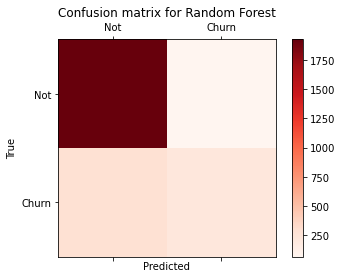

Logistic Regression
Accuracy is: 0.808
precision is: 0.5857988165680473
recall is: 0.1944990176817289


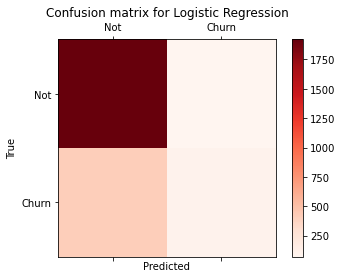

K nearest neighbor
Accuracy is: 0.8336
precision is: 0.6837944664031621
recall is: 0.33988212180746563


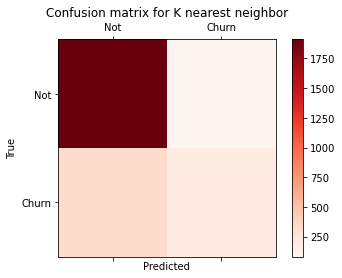

In [84]:
# Confusion matrix, accuracy, precison and recall for models
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]

draw_confusion_matrices(confusion_matrices)

### 3.4 Model Evaluation - ROC & AUC
#### - ROC of RF Model

In [87]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

In [88]:
best_RF_model.predict_proba(X_test)

array([[0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.75      , 0.25      ],
       ...,
       [0.95      , 0.05      ],
       [0.91666667, 0.08333333],
       [0.93333333, 0.06666667]])

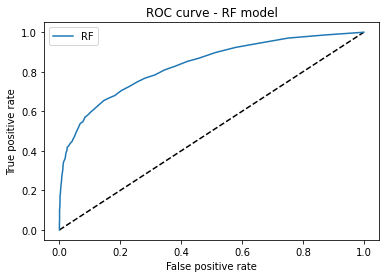

In [89]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [91]:
from sklearn import metrics

# AUC score
RF_AUC_score = metrics.auc(fpr_rf,tpr_rf)
print('AUC score of random forest model:', RF_AUC_score)

AUC score of random forest model: 0.8326970384411582


#### - ROC of LR Model

In [93]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thres = roc_curve(y_test, y_pred_lr)

best_LR_model.predict_proba(X_test)

array([[0.82436141, 0.17563859],
       [0.93202769, 0.06797231],
       [0.85487625, 0.14512375],
       ...,
       [0.71395014, 0.28604986],
       [0.89294779, 0.10705221],
       [0.85541012, 0.14458988]])

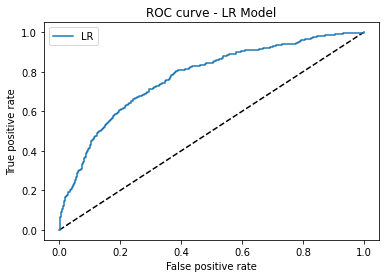

In [94]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [95]:
# AUC score
LR_AUC_score = metrics.auc(fpr_lr,tpr_lr)
print('AUC score of logistic regression model:', LR_AUC_score)

AUC score of logistic regression model: 0.7722462278682362


## Part 4 - Feature Importance
### 4.1 Logistic Regression Model - Feature Selection Discussion

In [99]:
# Add corelated features
X_with_corr = X.copy()
X_with_corr['SalaryInRMB'] = X['EstimatedSalary'] * 6.7
X_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,SalaryInRMB
0,619,True,42,2,0.00,1,1,1,101348.88,0,0,679037.496
1,608,True,41,1,83807.86,1,0,1,112542.58,0,1,754035.286
2,502,True,42,8,159660.80,3,1,0,113931.57,0,0,763341.519
3,699,True,39,1,0.00,2,0,0,93826.63,0,0,628638.421
4,850,True,43,2,125510.82,1,1,1,79084.10,0,1,529863.470


In [102]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.05, solver='liblinear')
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.7369
IsActiveMember : -0.5109
Geography_Germany : 0.3177
Gender : 0.2452
Balance : 0.1536
CreditScore : -0.0493
NumOfProducts : -0.0468
Tenure : -0.0308
SalaryInRMB : 0.0123
HasCrCard : -0.0058
EstimatedSalary : 0.0006
Geography_Spain : 0.0


In [104]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.05, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))
  

Logistic Regression (L2) Coefficients
Age : 0.74
IsActiveMember : -0.5174
Geography_Germany : 0.327
Gender : 0.2553
Balance : 0.1603
CreditScore : -0.0628
NumOfProducts : -0.058
Tenure : -0.0443
HasCrCard : -0.0195
EstimatedSalary : 0.0135
SalaryInRMB : 0.0135
Geography_Spain : 0.0127


### 4.2 Random Forest Model - Feature Importance Discussion

In [105]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1] # sort by importance

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2397
EstimatedSalary : 0.1463
Balance : 0.144
CreditScore : 0.1431
NumOfProducts : 0.1303
Tenure : 0.0805
IsActiveMember : 0.0403
Geography_Germany : 0.0263
HasCrCard : 0.0186
Gender : 0.0181
Geography_Spain : 0.0129


In [111]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_with_corr, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1] # sort by importance

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2225
NumOfProducts : 0.1265
Balance : 0.125
CreditScore : 0.1182
SalaryInRMB : 0.1142
EstimatedSalary : 0.1139
Tenure : 0.0679
IsActiveMember : 0.0397
Geography_Germany : 0.0265
Gender : 0.0179
HasCrCard : 0.0162
Geography_Spain : 0.0115
